### What is Seaborn?

- Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- While in Matplotlib you often had to write multiple lines of code to create a plot Seaborn makes assumptions on what you want which often translates into getting the same plot with 1 line of code.


In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Auto reloads notebook when changes are made
%reload_ext autoreload
%autoreload 2

**Importing Data**

In [2]:
# Load a built in dataset based on US State car crash percentages
crash = sns.load_dataset('car_crashes')

In [3]:
crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### Distribution Plots

#### Distribution Plot

- Provides a way to look at a univariate distribution.
    - A univeriate distribution provides a distribution for one variable 
- Kernal Density Estimation with a Histogram is provided
- kde=False removes the KDE
- Bins define how many buckets to divide the data up into between intervals

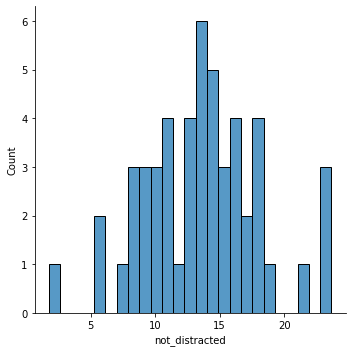

In [4]:
sns.displot(crash['not_distracted'], kde=False, bins=25);

#### Joint Plot

- Jointplot compares 2 distributions and plots a scatter plot by default
- As we can see as people tend to speed they also tend to drink & drive
- With kind you can create a regression line with kind='reg'
- You can create a 2D KDE with kind='kde'
- Kernal Density Estimation estimates the distribution of data
- You can create a hexagon distribution with kind='hex'

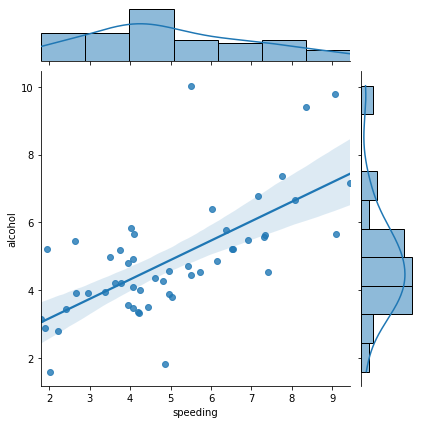

In [5]:
sns.jointplot(x='speeding', y='alcohol', data=crash, kind='reg');

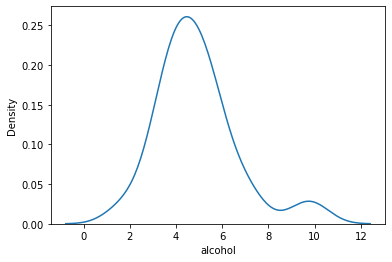

In [6]:
# only KDE plot
sns.kdeplot(crash['alcohol']);

#### Pair Plot

- Pair Plot plots relationships across the entire data frames numerical values

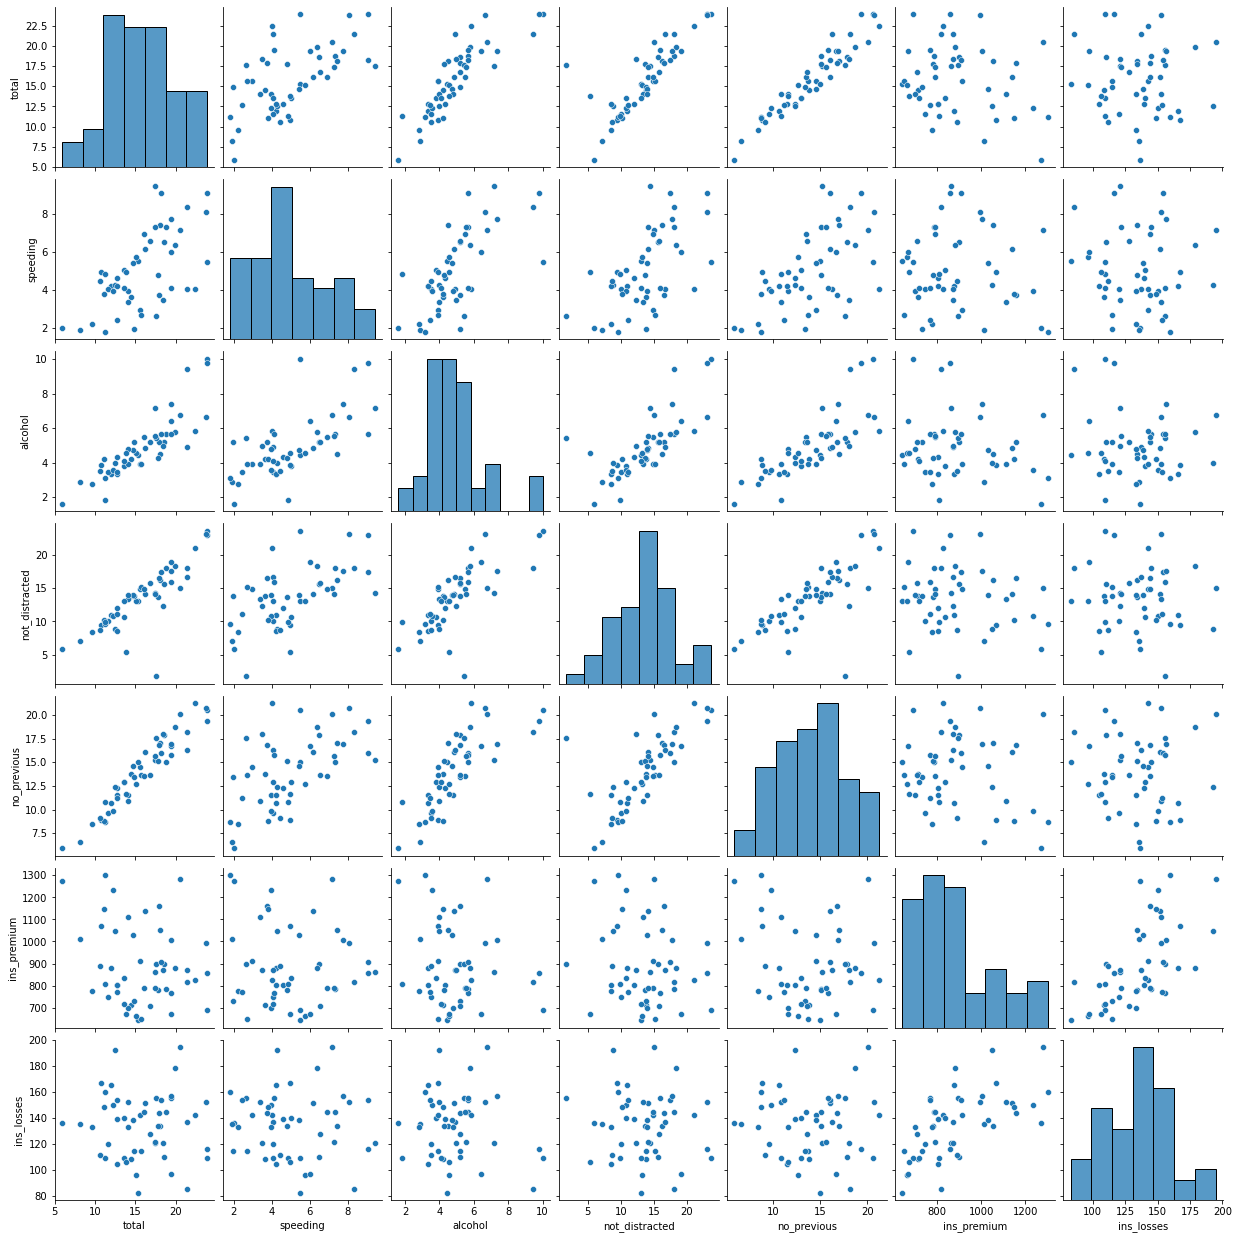

In [7]:
sns.pairplot(crash);

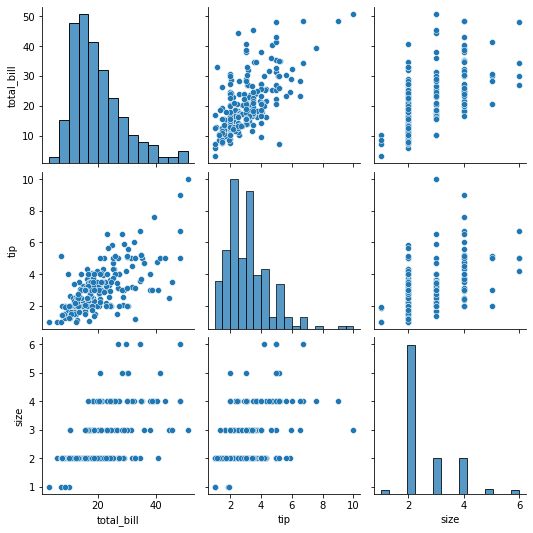

In [8]:
# loading tips dataset
tips = sns.load_dataset('tips')

sns.pairplot(tips);

#### Rug Plot

- Plots a single column of datapoints in an array as sticks on an axis
- With a rug plot you'll see a more dense number of lines where the amount is most common. This is like how a histogram is taller where values are more common

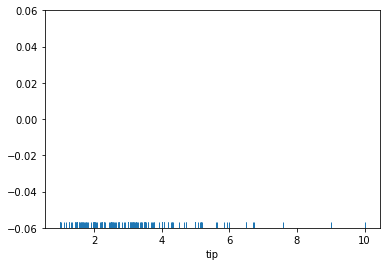

In [9]:
sns.rugplot(tips['tip']);

### Categorical Plots

#### Bar Plot

- Focus on distributions using categorical data in reference to one of the numerical columns
- Aggregate categorical data based on a function (mean is the default)
- Estimate total bill amount based on sex
- With estimator you can define functions to use other than the mean like those
- provided by NumPy : median, std, var, cov or make your own functions

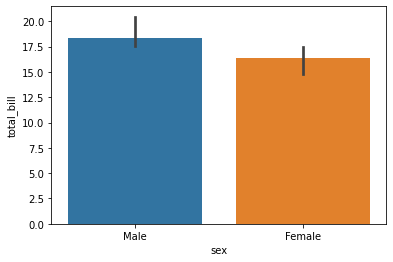

In [10]:
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.median);

#### Count Plot

-  A count plot is like a bar plot, but the estimator is counting the number of occurances

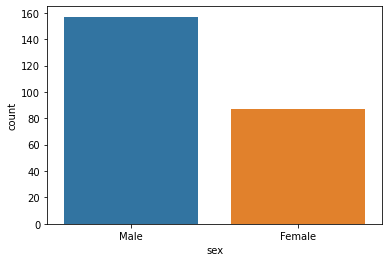

In [11]:
sns.countplot(x='sex', data=tips);

#### Box Plot

- A box plot allows you to compare different variables
- The box shows the quartiles of the data. The bar in the middle is the median andthe box extends 1 standard deviation from the median
- The whiskers extend to all the other data aside from the points that are considered to be outliers
- Hue can add another category being sex
- We see men spend way more on Friday versus less than women on Saturday

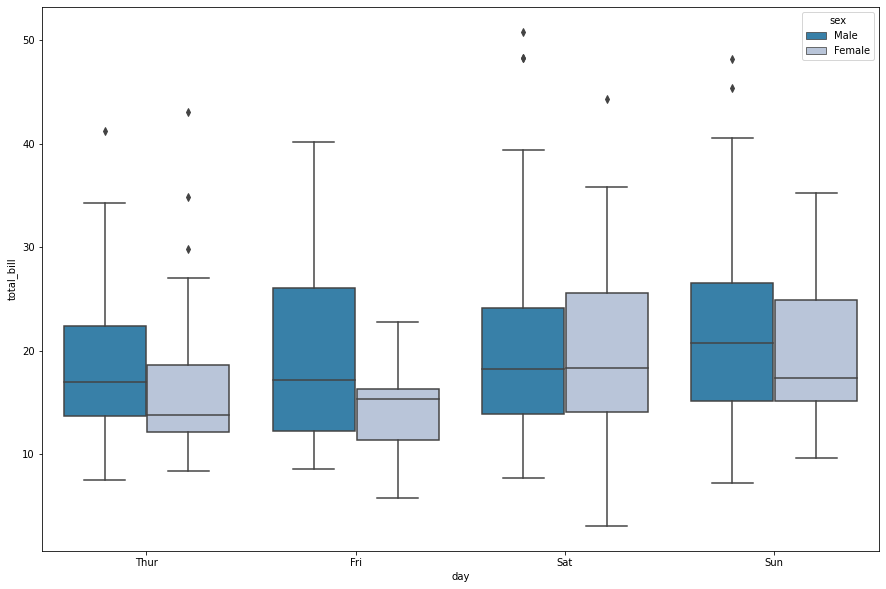

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex', palette='PuBu_r');

#### Violin Plot


- Violin Plot is a combination of the boxplot and KDE
- While a box plot corresponds to data points, the violin plot uses the KDE estimation of the data points
- Split allows you to compare how the categories compare to each other

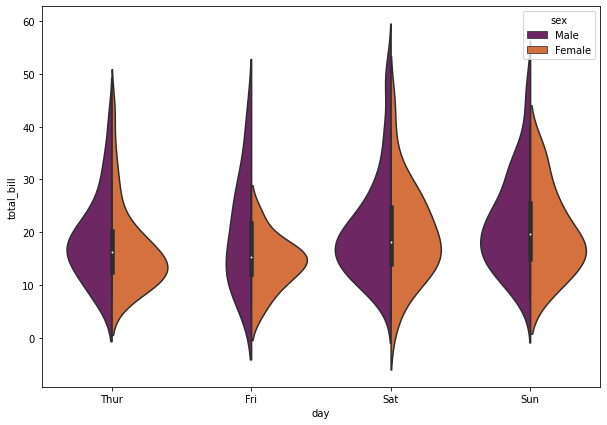

In [13]:
plt.figure(figsize=(10,7))
sns.violinplot(x='day', y='total_bill', data=tips, split=True, hue='sex', palette='inferno');

#### Strip Plot

- The strip plot draws a scatter plot representing all data points where onevariable is categorical. It is often used to show all observations with a box plot that represents the average distribution
- Jitter spreads data points out so that they aren't stacked on top of each other
- Hue breaks data into men and women
- Dodge separates the men and women data

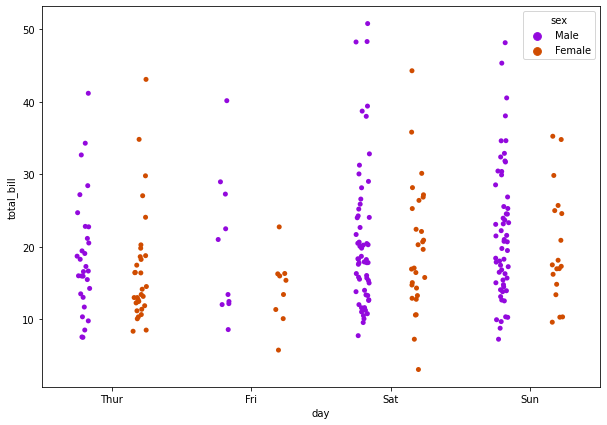

In [14]:
plt.figure(figsize=(10,7))
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True, palette='gnuplot');

#### Swarm Plot

- swarm plot is like a strip plot, but points are adjusted so they don't overlap
- It looks like a combination of the violin and strip plots

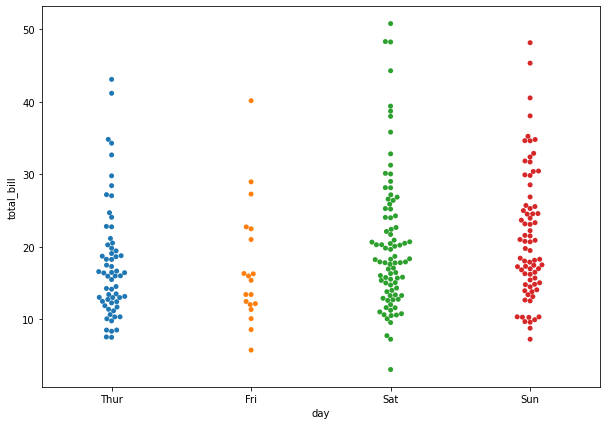

In [15]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='day', y='total_bill', data=tips);

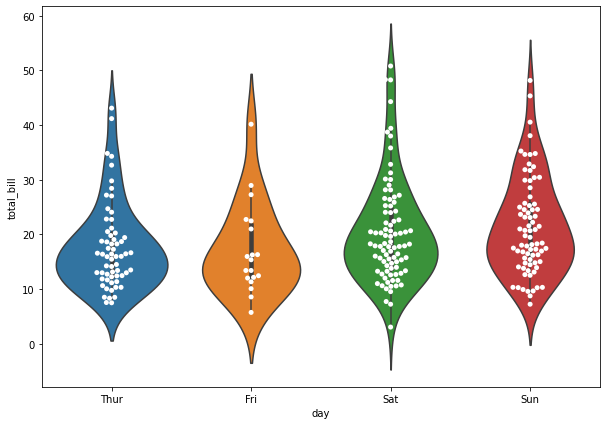

In [16]:
# you can stack violin plot with swarm plot
plt.figure(figsize=(10,7))
sns.violinplot(x='day',y='total_bill',data=tips);
sns.swarmplot(x='day',y='total_bill',data=tips, color='white');

### Matrix Plots

#### Heat Map

- To create a heatmap with data you must have data set up as a matrix where variables are on the columns and rows
- Correlation tells you how influential a variable is on the result
- So we see that n previous accident is heavily correlated with accidents, while theinsurance premium is not

In [17]:
# craeting correlation matrix
crashMatrix = crash.corr()
crashMatrix

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


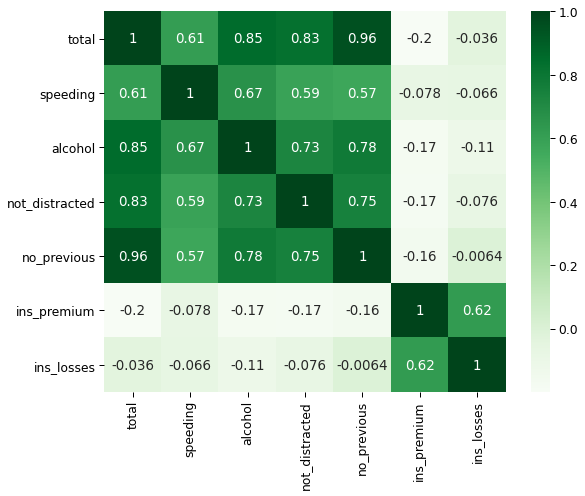

In [18]:
# plotting heat plot
plt.figure(figsize=(9,7))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(crashMatrix, annot=True, cmap='Greens');

- We can create a matrix with an index of month, columns representing years and the number of passengers for each
- We see that flights have increased over time and that most people travel in July and August.

In [19]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns='year', values='passengers')

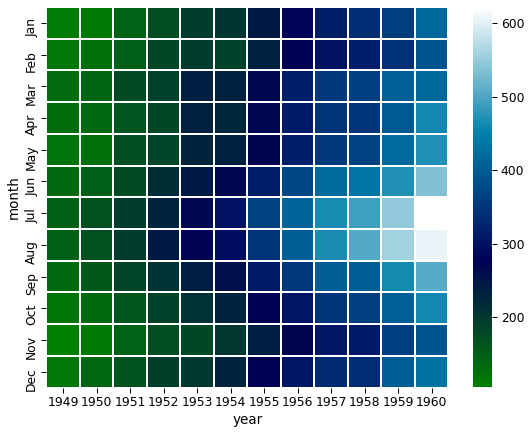

In [20]:
plt.figure(figsize=(9,7))
sns.set_context('paper', font_scale=1.4)

# You can separate data with lines
sns.heatmap(flights, cmap='ocean', linecolor='white', linewidth=1);

#### Cluster Map

- A Cluster map is a hierarchically clustered heatmap
- The distance between points is calculated, the closest are joined, and this continues for the next closest (It compares columns / rows of the heatmap)

- With our flights data we can see that years have been reoriented to place like data closer together
- You can see clusters of data for July & August for the years 59 & 60
- standard_scale normalizes the data to focus on the clustering

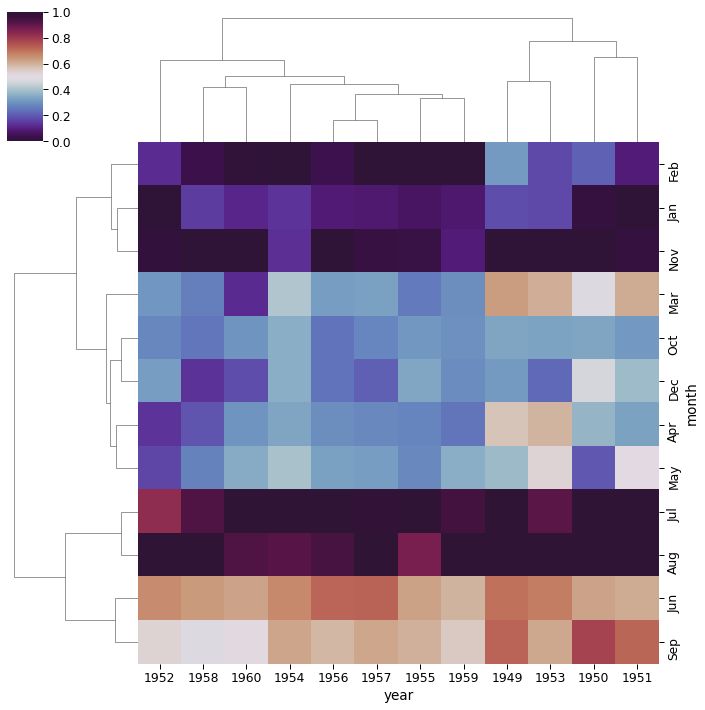

In [21]:
sns.clustermap(flights, cmap='twilight_shifted', standard_scale=1);

#### PairGrid

- You can create a grid of different plots with complete control over what is displayed

In [22]:
# loading iris dataset
iris = sns.load_dataset('iris')

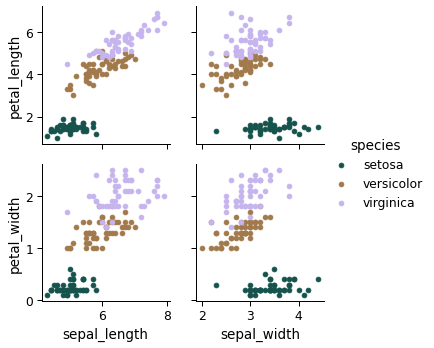

In [23]:
# You can define define variables for x & y for a custom grid
irisGrid = sns.PairGrid(iris, hue='species', 
                       x_vars=['sepal_length', 'sepal_width'],
                       y_vars=['petal_length', 'petal_width'], palette='cubehelix');

irisGrid.map(plt.scatter);

# add a legent
irisGrid.add_legend();

#### Facet Grid

- Can also print multiple plots in a grid in which you define columns & rows

In [24]:
# loading attention dataset
attention = sns.load_dataset('attention')

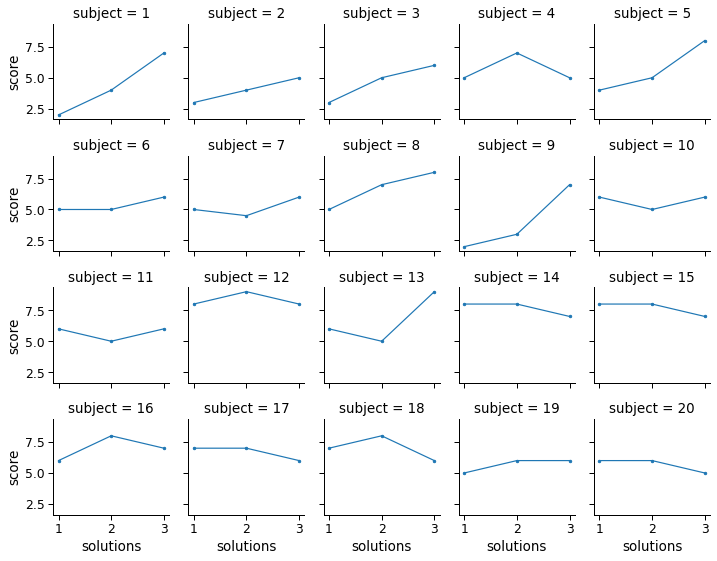

In [25]:
# Put each person in their own plot with 5 per line and plot their scores
att_fg = sns.FacetGrid(attention, col='subject', col_wrap=5, height=2);
att_fg.map(plt.plot, 'solutions', 'score', marker='.');

#### Regression Plot

- lmplot combines regression plots with facet grid
- We can plot a regression plot studying whether total bill effects the tip
- hue is used to show separation based off of categorical data
- We see that males tend to tip slightly more
- Define different markers for men and women
- You can effect the scatter plot by passing in a dictionary for styling of markers

In [26]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 720x504 with 0 Axes>

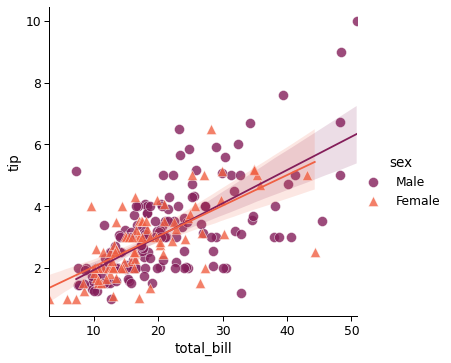

In [27]:
plt.figure(figsize=(10,7))
sns.set_context('paper', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, markers=['o', '^'],
          scatter_kws={'s':100, 'linewidth':0.5, 'edgecolor': 'w'}, palette='rocket');

<Figure size 720x504 with 0 Axes>

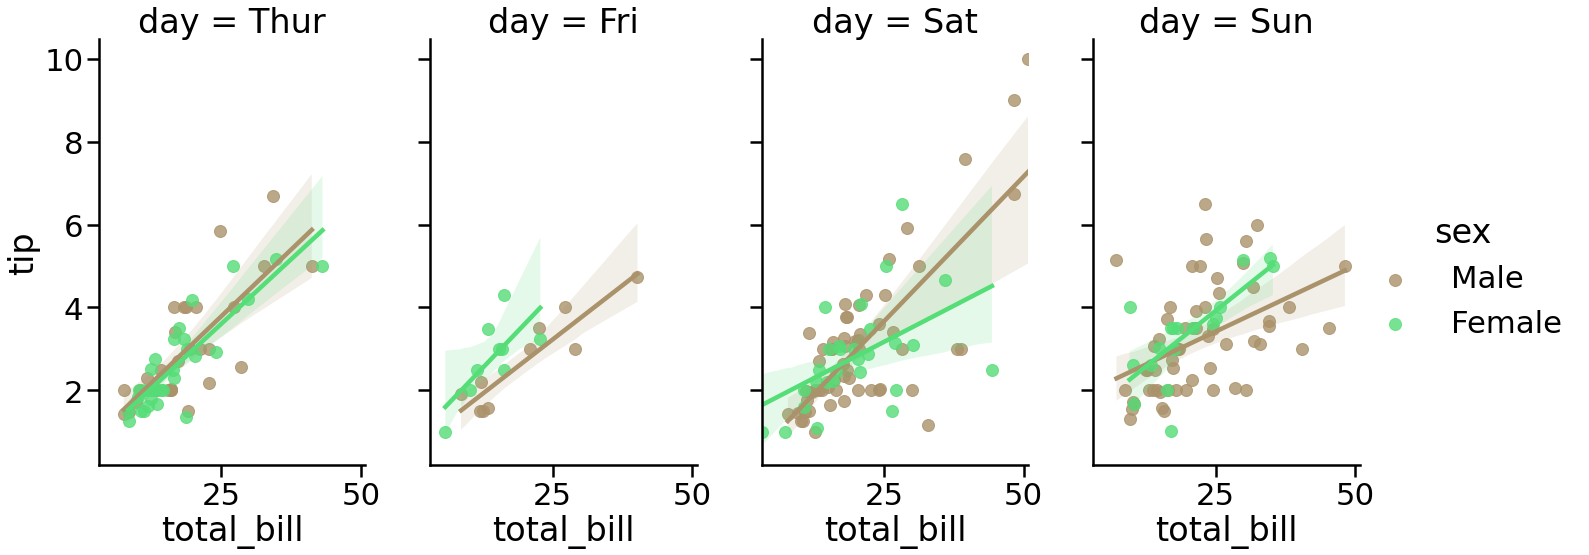

In [28]:
# You can separate the data into separate columns for day data

plt.figure(figsize=(10,7))
sns.set_context('poster', font_scale=1.4)

sns.lmplot(x='total_bill', y='tip', data=tips, col='day', hue='sex',
          height=8, aspect=0.6, palette='terrain_r');